In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('houses_dataset_us_locations.csv')

# Display the first few rows of the dataset
print(df.head())

   HouseID  Size(sqft)  Number of Bedrooms  Number of Bathrooms  \
0        1        3532                   1                    3   
1        2        3407                   4                    1   
2        3        2453                   1                    3   
3        4        1635                   5                    3   
4        5        1563                   5                    1   

            Location  Price($)  
0      Charlotte, NC     92113  
1       New York, NY    338562  
2  San Francisco, CA    392880  
3     Fort Worth, TX    309067  
4     Washington, DC    316706  


In [3]:

# Check for missing values
print(df.isnull().sum())

# Define features and target variable
X = df[['Size(sqft)', 'Number of Bedrooms', 'Number of Bathrooms']]
y = df['Price($)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Print the RMSE
print(f'Root Mean Squared Error: {rmse}')


HouseID                0
Size(sqft)             0
Number of Bedrooms     0
Number of Bathrooms    0
Location               0
Price($)               0
dtype: int64
Root Mean Squared Error: 132654.2305544884


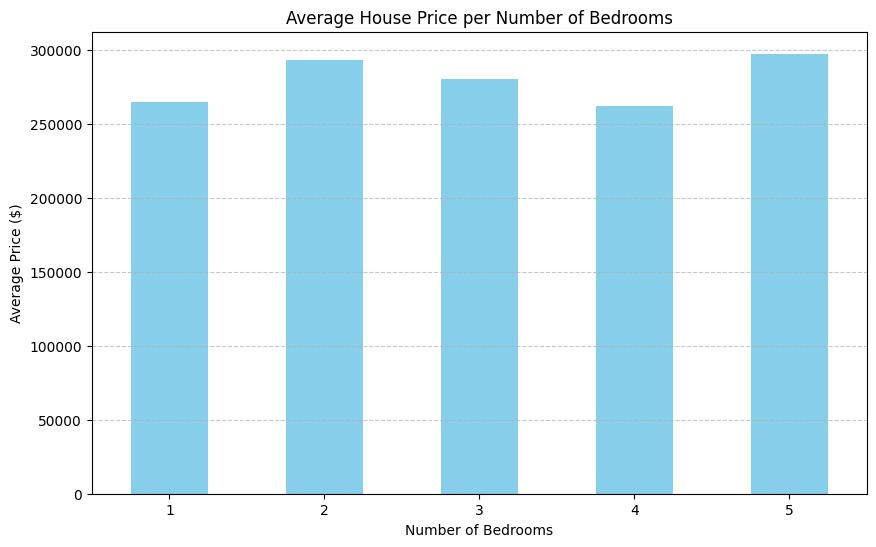

In [4]:
import matplotlib.pyplot as plt

# Calculate average house price for each number of bedrooms
avg_price_per_bedroom = df.groupby('Number of Bedrooms')['Price($)'].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
avg_price_per_bedroom.plot(kind='bar', color='skyblue')
plt.title('Average House Price per Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

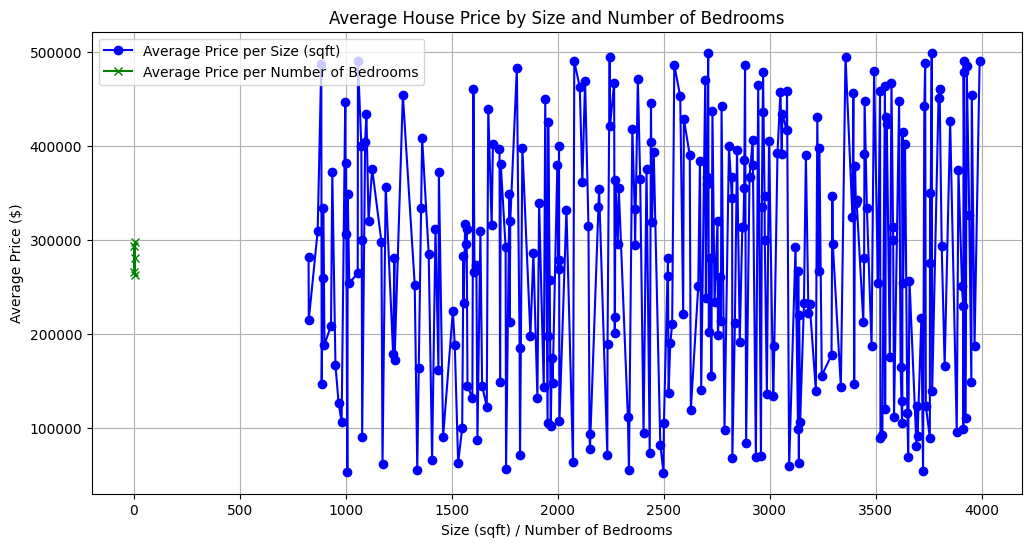

In [5]:
import matplotlib.pyplot as plt

# Calculate average house price for each size and number of bedrooms
avg_price_per_size = df.groupby('Size(sqft)')['Price($)'].mean()
avg_price_per_bedroom = df.groupby('Number of Bedrooms')['Price($)'].mean()

# Sort the index for smooth line plots
avg_price_per_size = avg_price_per_size.sort_index()
avg_price_per_bedroom = avg_price_per_bedroom.sort_index()

# Plot the line graph
plt.figure(figsize=(12, 6))

# Plot average price per size
plt.plot(avg_price_per_size.index, avg_price_per_size.values, label='Average Price per Size (sqft)', color='blue', marker='o')

# Plot average price per number of bedrooms
plt.plot(avg_price_per_bedroom.index, avg_price_per_bedroom.values, label='Average Price per Number of Bedrooms', color='green', marker='x')

# Add titles and labels
plt.title('Average House Price by Size and Number of Bedrooms')
plt.xlabel('Size (sqft) / Number of Bedrooms')
plt.ylabel('Average Price ($)')
plt.legend()
plt.grid(True)
plt.show()


Location
Washington, DC       19
Charlotte, NC        18
Los Angeles, CA      18
Seattle, WA          18
Indianapolis, IN     18
Philadelphia, PA     17
Denver, CO           17
Phoenix, AZ          17
New York, NY         16
San Diego, CA        16
Columbus, OH         15
Chicago, IL          15
San Francisco, CA    15
Fort Worth, TX       13
Dallas, TX           13
Houston, TX          12
Jacksonville, FL     11
Austin, TX           11
San Antonio, TX      11
San Jose, CA         10
Name: count, dtype: int64


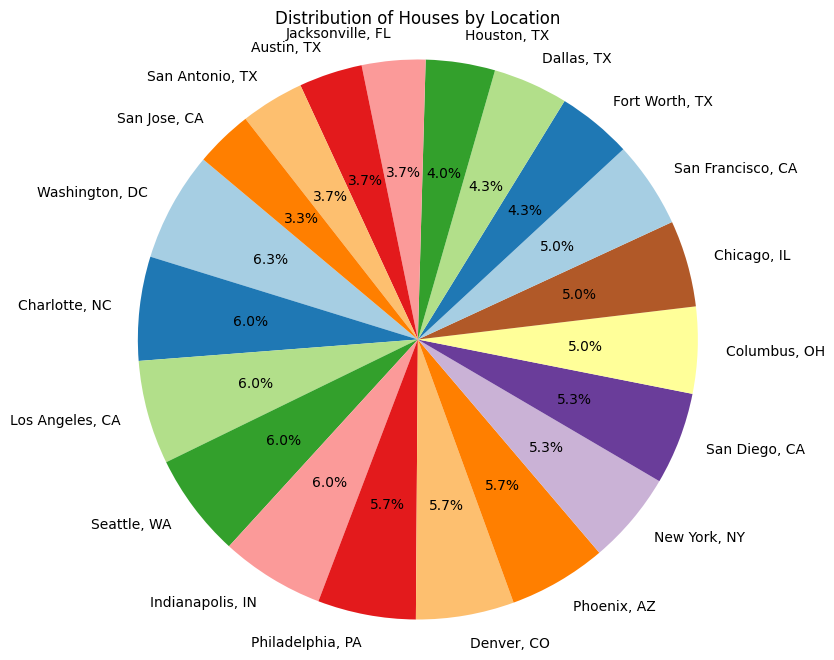

In [6]:
import matplotlib.pyplot as plt

# Count of houses in each location
location_counts = df['Location'].value_counts()

# Print the count of houses in each location
print(location_counts)

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Houses by Location')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
